In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [2]:
data_path = './Dataset/'
batch_size = 32
target_size = (64, 64)

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [4]:
X_train = train_datagen.flow_from_directory(data_path,
                                            target_size=target_size,
                                            batch_size=batch_size,
                                            color_mode="rgb",
                                            subset="training",
                                            class_mode='categorical')



X_test = test_datagen.flow_from_directory(data_path,
                                          target_size=target_size,
                                          batch_size=batch_size,
                                          color_mode="rgb",
                                          subset="validation",
                                          class_mode='categorical')

Found 3544 images belonging to 4 classes.
Found 884 images belonging to 4 classes.


In [5]:
model = Sequential()

In [6]:
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(X_train, 
          steps_per_epoch=len(X_train), 
          epochs=20,
          validation_data=X_test,
          validation_steps=len(X_test))

Epoch 1/20
111/111 [==============================] - 63s 495ms/step - loss: 1.0808 - accuracy: 0.5282 - val_loss: 0.7762 - val_accuracy: 0.7025
Epoch 2/20
111/111 [==============================] - 52s 470ms/step - loss: 0.7012 - accuracy: 0.7322 - val_loss: 0.7050 - val_accuracy: 0.7353
Epoch 3/20
111/111 [==============================] - 50s 448ms/step - loss: 0.6575 - accuracy: 0.7525 - val_loss: 1.1470 - val_accuracy: 0.6210
Epoch 4/20
111/111 [==============================] - 47s 428ms/step - loss: 0.5846 - accuracy: 0.7847 - val_loss: 0.8129 - val_accuracy: 0.6980
Epoch 5/20
111/111 [==============================] - 49s 442ms/step - loss: 0.5523 - accuracy: 0.7999 - val_loss: 0.6012 - val_accuracy: 0.7760
Epoch 6/20
111/111 [==============================] - 52s 470ms/step - loss: 0.5448 - accuracy: 0.7923 - val_loss: 0.7817 - val_accuracy: 0.7048
Epoch 7/20
111/111 [==============================] - 46s 415ms/step - loss: 0.4935 - accuracy: 0.8149 - val_loss: 0.6035 - val_ac

In [10]:
model.save("disaster.h5")

In [24]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict(image_path):
	img = image.load_img(image_path, target_size=target_size)
	x = image.img_to_array(img)
	x = np.expand_dims(x, axis=0)

	labels = ['Cyclone', 'Earthquake', 'Flood', 'Wildfire']
		
	pred = model.predict(x)
	prediction = labels[np.argmax(pred[0])]

	print(f'Disaster: {prediction}')
	plt.imshow(plt.imread(image_path))
	plt.axis('off')
	plt.show()

1/1 [==============================] - 0s 26ms/step
Disaster: Wildfire


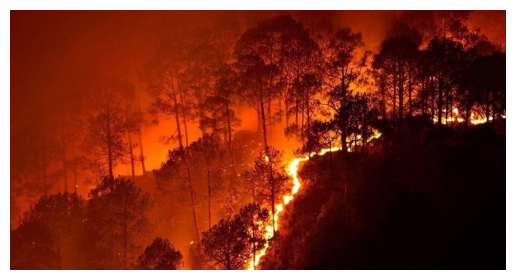

In [25]:
predict('./Sample/1.jpg')

1/1 [==============================] - 0s 26ms/step
Disaster: Cyclone


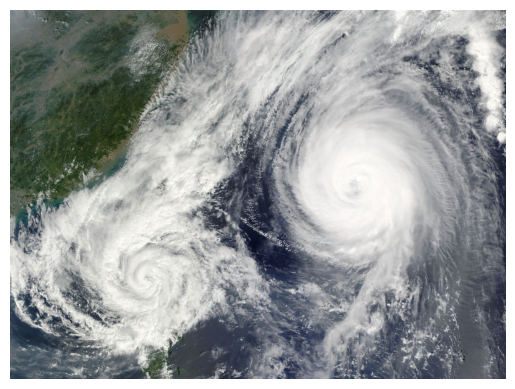

In [26]:
predict('./Sample/2.jpg')


1/1 [==============================] - 0s 31ms/step
Disaster: Earthquake


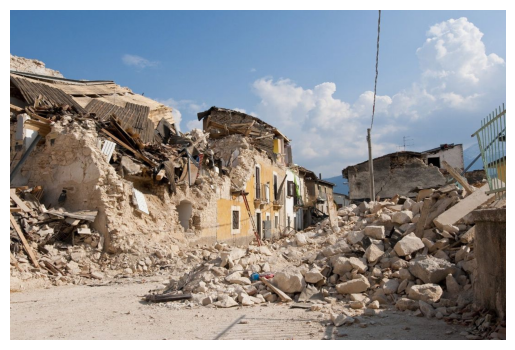

In [27]:
predict('./Sample/3.jpg')


1/1 [==============================] - 0s 26ms/step
Disaster: Flood


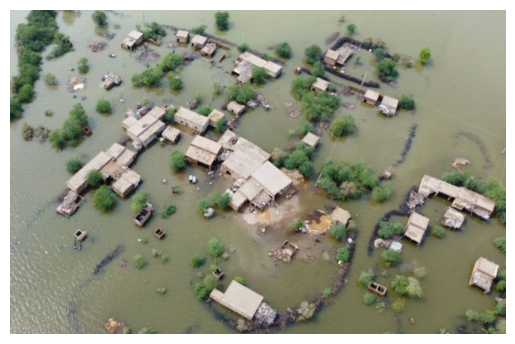

In [28]:
predict('./Sample/4.jpg')
